In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import norm
from plotly.offline import iplot
import plotly as py
import plotly.express as px
import plotly.tools as tls
import cufflinks as cf

### Problem 1

In [2]:
# We have the min and max temperatures in a city In India for each months of the year.
# We would like to find a function to describe this and show it graphically, the dataset
# given below.

# Task:
#     1. fitting it to the periodic function
#     2. plot the fit
# Data
#   Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
#   Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

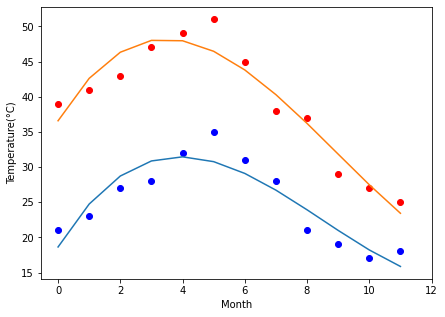

In [3]:
## Option 1

min_temps = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
max_temps = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

months = list(range(0, 12))

min_temps_fit = np.polyfit(months, min_temps, 3)
max_temps_fit = np.polyfit(months, max_temps, 3)

fig = plt.figure(figsize=(7, 5))
axes = fig.add_subplot(1, 1, 1)

p_min = np.poly1d(min_temps_fit)
p_max = np.poly1d(max_temps_fit)


plt.scatter(x=months, y=min_temps, c="Blue")
plt.plot(months, p_min(months))

plt.scatter(x=months, y=max_temps, c="Red")
plt.plot(months, p_max(months))

plt.xlabel("Month")
plt.ylabel("Temperature(°C)")

# By default Month 12 not displayed. Hence this xticks
plt.xticks(range(0, 14, 2))

plt.show()

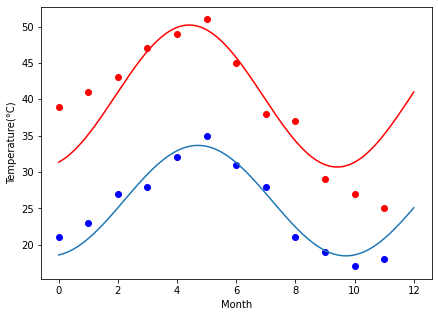

Min guess : [26.0, 9.0, 5], Final Values: [26.05757363  7.59813447  7.79402443]
Max guess : [38.0, 13.0, 5], Final Values: [40.44930244  9.76918107  8.09003435]


In [4]:
## Option 2

min_temps = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
max_temps = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

months = np.array(range(0, 12))

# Will try to fit a sin/cos wave.
# These are the observations.
# 1. The peak should be the month with index 5
# 2. The curve comes down and should start rising again after 
#    month with index 10. At least for min temperature we can
#    see this rise clearly after month with index 10
# 3. 

# Test function with coefficients as parameters 
# Using a Sine Wave.

def test(x, bias, amplitude, angle_offset):
    # Taking the periodicity as 10 (month index 0 to month index 10)
    return (bias + amplitude * np.sin((x + angle_offset) * 2 * np.pi / 10))

min_amplitute_guess = (np.max(min_temps) - np.min(min_temps)) / 2
min_bias_guess      = np.min(min_temps) + min_amplitute_guess
min_angle_guess     = 5

max_amplitute_guess = (np.max(max_temps) - np.min(max_temps)) / 2
max_bias_guess      = np.min(max_temps) + max_amplitute_guess
max_angle_guess     = 5

min_guess = [min_bias_guess, min_amplitute_guess, min_angle_guess]
max_guess = [max_bias_guess, max_amplitute_guess, max_angle_guess]

param_min, _ = curve_fit(test, months, min_temps, p0=min_guess)
param_max, _ = curve_fit(test, months, max_temps, p0=max_guess)

days = np.linspace(0, 12, 365)

fig = plt.figure(figsize=(7, 5))
axes = fig.add_subplot(1, 1, 1)

plt.scatter(x=months, y=min_temps, c="Blue")
plt.plot(days, test(days, *param_min))

plt.scatter(x=months, y=max_temps, c="Red")
plt.plot(days, test(days, *param_max), c="Red")

plt.xlabel("Month")
plt.ylabel("Temperature(°C)")

plt.xticks(range(0, 14, 2))

plt.show()

print(f"Min guess : {min_guess}, Final Values: {param_min}")
print(f"Max guess : {max_guess}, Final Values: {param_max}")

### Problem 2

In [5]:
# This assignment is for visualization using matplotlib:
# data to use:
# url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
# titanic = pd.read_csv(url)
# Charts to plot:
# 1. Create a pie chart presenting the male/female proportion
# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [6]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [7]:
# 1. Create a pie chart presenting the male/female proportion

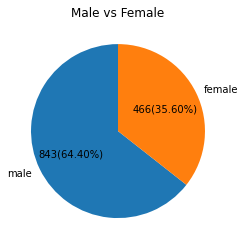

In [8]:
# Option 1 with matplotlib

value_counts = titanic['sex'].value_counts()

labels = ['male', 'female']

num_male   = value_counts['male']
num_female = value_counts['female']

values = [value_counts[labels[0]], value_counts[labels[1]]]

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', startangle=90)

for i, a in enumerate(autotexts) :
    a.set_text(f"{value_counts[labels[i]]}({a.get_text()})")
    
#plt.legend(loc="best")
plt.title("Male vs Female")
plt.show();

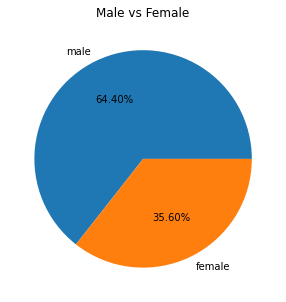

In [9]:
# Option 2 With Pandas

ret_val = titanic['sex'].value_counts().plot(kind="pie",legend=False, title="Male vs Female",
                                             autopct='%1.2f%%', figsize=(5,5))
ret_val.set_ylabel('');

In [10]:
# Option 3 with Plotly Cufflinks
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [11]:
df = titanic['sex'].value_counts().reset_index()

df.iplot(kind="pie", labels='index', values='sex')

In [12]:
# Option 4 with Plotly Express

df = titanic['sex'].value_counts().reset_index()

fig = px.pie(df, names='index', values='sex', title="Male vs Female")
fig.show()

In [13]:
# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

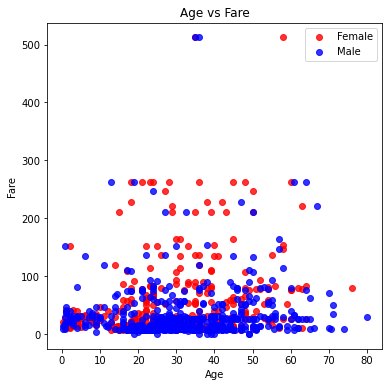

In [14]:
# Option 1 with matplotlib

females_filter = titanic['sex'] == 'female'
males_filter   = titanic['sex'] == 'male'

fares  = [titanic['fare'][females_filter], titanic['fare'][males_filter]]
ages   = [titanic['age'][females_filter], titanic['age'][males_filter]]
colors = ['red', 'blue']
labels = ['Female', 'Male']

# Create plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

for i in range(2) :
    ax.scatter(ages[i], fares[i], alpha=0.8, c=colors[i], label=labels[i])
    
plt.title('Age vs Fare')
plt.legend(loc="best")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

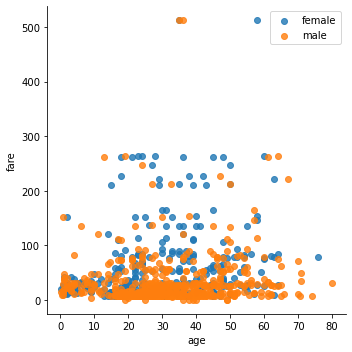

In [15]:
# Option 2 with seaborn lmplot

import seaborn as sns
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="age", y="fare", data=titanic, fit_reg=False, hue='sex', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='best')
plt.show()

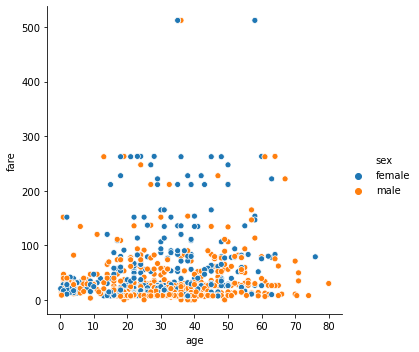

In [16]:
# Option 2 with seaborn relplot

# Use the 'hue' argument to provide a factor variable
sns.relplot( x="age", y="fare", data=titanic, hue='sex')
 
# Move the legend to an empty part of the plot
#plt.legend(loc='best')
plt.show()

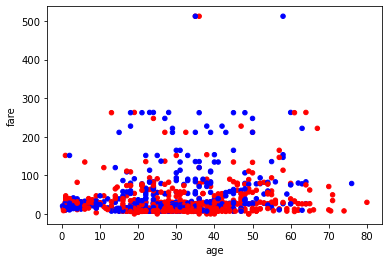

In [17]:
# Option 4 with Pandas

color_map = {'male': 'r', 'female': 'b'}

colors = titanic.sex.map(lambda x : color_map.get(x, 'k'))

titanic.plot.scatter(x="age", y="fare", c=colors);

## Unable to get legends, so trying another Pandas option in next step

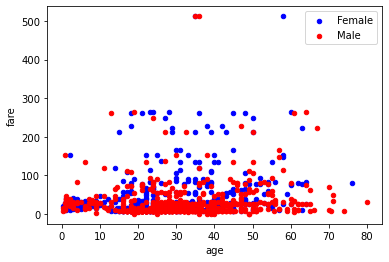

In [18]:
# Option 5 with Pandas

females_filter = titanic['sex'] == 'female'
males_filter   = titanic['sex'] == 'male'

males   = titanic[males_filter]
females = titanic[females_filter]

ax = females.plot.scatter(x="age", y="fare", c='b', label='Female')
males.plot.scatter(x="age", y="fare", c='r', label='Male', ax=ax)

In [19]:
# Option 6, with Plotly Cufflinks

color_map = {'male': 'red', 'female': 'blue'}

colors = titanic.sex.map(lambda x : color_map.get(x, 'black'))

titanic.iplot(kind="scatter", x='age', y='fare', categories='sex', mode = 'markers', xTitle='Age', yTitle='Fare')

/home/anish/anaconda3/lib/python3.7/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/anish/anaconda3/lib/python3.7/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [20]:
# Option 7 with Plotly Express

px.scatter(titanic.dropna(axis=0, how="all"), x="age", y="fare", color="sex")